## What is a Variable?

_A variable is any characteristic, number, or quantity that can be measured or counted. The following are examples of variables:_

1. _Age (21, 35, 62, ...)_
2. _Gender (male, female)_
3. _Income (GBP 20000, GBP 35000, GBP 45000, ...)_
4. _House price (GBP 350000, GBP 570000, ...)_
5. _Country of birth (China, Russia, Costa Rica, ...)_
6. _Eye colour (brown, green, blue, ...)_
7. _Vehicle make (Ford, Volkswagen, ...)_

_They are called 'variables' because the value they take may vary (and it usually does) in a population._


_Most variables in a data set can be classified into one of two major types:_

* _Numerical variables_
* _Categorical variables_

### Numerical Variables
_The values of a numerical variable are numbers. They can be further classified into discrete and continuous variables._

#### 1. _Discrete Numerical Variable_
_A variable which values are whole numbers (counts) is called discrete. For example, the number of items bought by a customer in a supermarket is discrete. The customer can buy 1, 25, or 50 items, but not 3.7 items. It is always a round number. The following are examples of discrete variables:_

1. _Number of active bank accounts of a borrower (1, 4, 7, ...)_
2. _Number of pets in the family_
3. _Number of children in the family_


#### 2. _Continuous Numerical Variable_
_A variable that may contain any value within some range is called continuous. For example, the total amount paid by a customer in a supermarket is continuous. The customer can pay, GBP 20.5, GBP 13.10, GBP 83.20 and so on. Other examples of continuous variables are:_

1. _House price (in principle, it can take any value) (GBP 350000, 57000, 1000000, ...)_
2. _Time spent surfing a website (3.4 seconds, 5.10 seconds, ...)_
3. _Total debt as percentage of total income in the last month (0.2, 0.001, 0, 0.75, ...)_

In [0]:
# Importing Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Follow article: https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0

!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"","key":""}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [4]:
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

!kaggle datasets download -d wendykan/lending-club-loan-data -p /content

!unzip \*.zip

- path is now set to: {/content}
 99% 712M/720M [00:10<00:00, 29.2MB/s]
100% 720M/720M [00:10<00:00, 68.7MB/s]
Archive:  lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                


In [0]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [6]:
# Download dataset: https://www.kaggle.com/wendykan/lending-club-loan-data or Link to Kaggle

use_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status', 'open_il_12m','id', 'purpose', 'loan_status', 'home_ownership','loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('/content/loan.csv', usecols=use_cols)
data1 = data.sample(10000, random_state=44)  # set a seed for reproducibility
data.head()

,id,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,last_pymnt_d,open_il_12m
0,NaN,2500,13.56,C,RENT,55000.0,Dec-2018,Current,debt_consolidation,9.0,Feb-2019,1.0
1,NaN,30000,18.94,D,MORTGAGE,90000.0,Dec-2018,Current,debt_consolidation,13.0,Feb-2019,2.0
2,NaN,5000,17.97,D,MORTGAGE,59280.0,Dec-2018,Current,debt_consolidation,8.0,Feb-2019,0.0
3,NaN,4000,18.94,D,MORTGAGE,92000.0,Dec-2018,Current,debt_consolidation,10.0,Feb-2019,3.0
4,NaN,30000,16.14,C,MORTGAGE,57250.0,Dec-2018,Current,debt_consolidation,12.0,Feb-2019,3.0


In [7]:
data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 12 columns):
id                float64
loan_amnt         int64
int_rate          float64
grade             object
home_ownership    object
annual_inc        float64
issue_d           object
loan_status       object
purpose           object
open_acc          float64
last_pymnt_d      object
open_il_12m       float64
dtypes: float64(5), int64(1), object(6)
memory usage: 207.0+ MB


In [9]:
# Continous Variable
data1.loan_amnt.unique()

array([12000, 20000, 35000,  8000, 17000, 14000, 10000, 40000,  9000,
       16000, 15000,  1500, 22000,  4000, 12800, 17100,  6600, 16250,
        3575,  6000, 10200,  3825, 21600,  7000, 10925,  4800, 25000,
       18325, 15025,  7150,  9600,  8400,  7500, 16125,  2000, 28100,
       29000,  6400, 22800, 20800, 11325,  5000,  8575, 19125, 30400,
        2800, 11875,  3600,  8500,  9800, 21000, 30800, 27225,  1450,
       36000,  3500, 22650, 23550,  3300, 19200, 34975, 14400,  4475,
        2300, 24000, 11000, 30000,  5400, 10400,  8850, 12375, 13600,
       24875, 36425,  2400, 15600, 18900,  9875, 28000, 15225, 18000,
        7200,  2500, 13975, 11075, 10975, 19000,  3200,  4500, 11200,
       13000, 18500, 14125,  7325, 16800, 22150,  2700, 21900,  4900,
        8250,  9500,  3000, 27625,  1600, 32000, 13550, 10550, 23000,
       21550, 13500, 32350, 20875, 14925, 19500, 11150, 17025,  7800,
        1200, 10050, 21100,  8725, 10850, 13200, 20700, 26000, 19600,
       11500,  1000,

In [0]:
plt.style.use('seaborn-pastel')

Text(0, 0.5, 'Number of Loans')

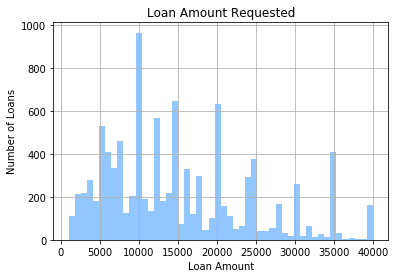

In [11]:
fig = data1.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

_The values of the variable vary across the entire range of the variable. This is characteristic of continuous variables._

In [12]:
data1.int_rate.unique()

array([10.33, 11.99, 18.25,  7.99,  9.16,  8.39, 16.91,  9.92, 11.39,
        7.59, 15.31, 16.55,  9.93, 12.99,  7.26, 11.06, 10.99, 11.49,
       12.29,  9.17,  8.46,  6.49, 12.62,  8.19,  7.49, 15.59, 11.44,
       13.99, 17.97, 10.08, 13.67, 13.49, 13.59, 27.79, 15.96, 15.99,
       13.35,  6.89, 19.92, 20.39,  9.99, 15.61,  6.67,  7.89, 18.99,
       21.85, 12.69, 21.98, 11.47, 15.05, 12.12,  9.67,  6.11, 18.49,
       16.29,  7.97, 14.09, 14.65, 14.33, 10.91, 16.01, 16.78, 12.73,
       17.99, 22.2 ,  8.24, 10.56, 22.99, 14.49, 15.1 ,  6.62, 14.42,
        5.32, 14.08, 14.99,  8.81, 21.99,  5.31, 12.39,  9.71, 11.55,
        6.99, 15.49, 22.95, 26.3 , 11.03,  7.07,  7.21, 17.57, 22.35,
       23.88, 24.49, 30.17, 16.02, 20.75, 10.16, 10.42,  9.43, 25.83,
        7.84, 18.94,  9.44, 19.99, 15.04, 16.99, 17.27,  9.49, 24.08,
        8.9 , 30.99, 11.48, 14.72, 17.86,  7.34, 16.14,  8.99, 22.4 ,
        6.83,  5.93, 11.98,  8.08, 18.06, 13.56, 14.46, 10.15, 11.22,
       21.  , 21.49,

Text(0, 0.5, 'Number of Loans')

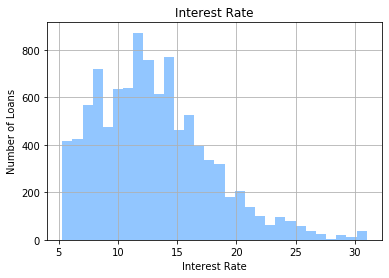

In [13]:
fig = data1.int_rate.hist(bins=30)
fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Text(0, 0.5, 'Number of Customers')

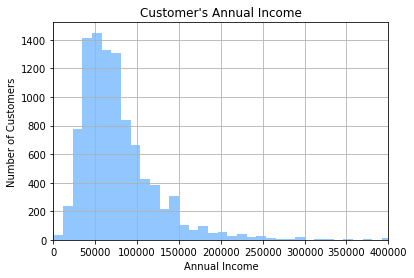

In [14]:
fig = data1.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

In [15]:
# Discrete Variable
data1.open_acc.dropna().unique()

array([10.,  9., 27., 12.,  5., 19., 11., 14.,  8., 24., 15.,  7., 26.,
       22., 18., 21., 16., 17., 25., 23.,  4.,  6., 30.,  3., 31., 13.,
       28., 20., 29., 37.,  1., 35., 36., 44.,  2., 34., 39., 33., 32.,
       38., 40., 47., 46., 48., 43.,  0., 56., 42.])

_This is, the total number of credit items (for example, credit cards, car loans, mortgages, etc) that is known for that borrower. By definition it is a discrete variable, because a borrower can have 1 credit card, but not 3.5 credit cards._

Text(0, 0.5, 'Number of Customers')

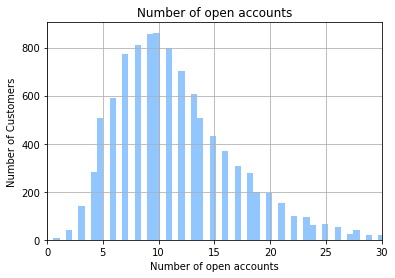

In [16]:
fig = data1.open_acc.hist(bins=100)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

In [17]:
data1.open_il_12m.unique()

array([ 2.,  0., nan,  1.,  3.,  5.,  4.,  6.,  7.])

Text(0, 0.5, 'Number of Borrowers')

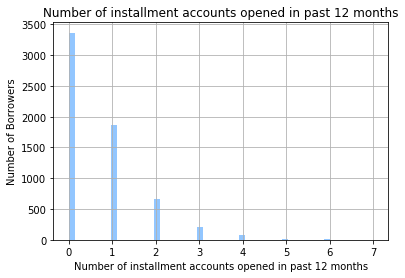

In [18]:
fig = data1.open_il_12m.hist(bins=50)
fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

_Histograms of discrete variables have this typical broken shape, as not all the values within the variable range are present in the variable._

In [19]:
# Discrete Variable: Binary Value
data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

_Binary variables, are discrete variables, that can take only 2 values, therefore binary._

_In the next cells we will create an additional variable, called defaulted, to capture the number of loans that have defaulted. A defaulted loan is a loan that a customer has failed to re-pay and the money is lost._

_The variable takes the values 0 where the loans are ok and being re-paid regularly, or 1, when the borrower has confirmed that will not be able to re-pay the borrowed amount._

In [20]:
data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)
data.defaulted.mean()

1.3712761006923617e-05

In [21]:
data[data.loan_status.isin(['Default'])].head()

,id,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,last_pymnt_d,open_il_12m,defaulted
220496,NaN,7500,12.73,B,MORTGAGE,50000.0,Jul-2018,Default,medical,4.0,Oct-2018,1.0,1
220980,NaN,30000,20.89,D,MORTGAGE,109000.0,Jul-2018,Default,debt_consolidation,12.0,Feb-2019,1.0,1
260870,NaN,1000,17.47,D,MORTGAGE,56160.0,Jun-2018,Default,other,4.0,NaN,0.0,1
338482,NaN,35000,10.90,B,OWN,30000.0,May-2018,Default,debt_consolidation,3.0,Feb-2019,0.0,1
347594,NaN,22000,24.84,E,RENT,62000.0,Apr-2018,Default,other,16.0,Feb-2019,2.0,1


In [22]:
data.defaulted.unique()

array([0, 1])

Text(0, 0.5, 'Number of Loans')

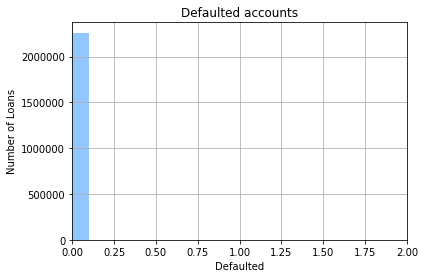

In [23]:
fig = data.defaulted.hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

### Categorical Variables

_The values of a categorical variable are selected from a group of categories, also called labels. Examples are gender (male or female) and marital status (never married, married, divorced or widowed). Other examples of categorical variables include:_

1. _Intended use of loan (debt-consolidation, car purchase, wedding expenses, ...)_
2. _Mobile network provider (Vodafone, Orange, ...)_
3. _Postcode_
4. _Categorical variables can be further categorised into ordinal and nominal variables._


#### _Ordinal Categorical Variable_
_Categorical variable in which categories can be meaningfully ordered are called ordinal. For example:_

1. _Student's grade in an exam (A, B, C or Fail)._
2. _Days of the week can be ordinal with Monday = 1 and Sunday = 7._
3. _Educational level, with the categories Elementary school, High school, College graduate and PhD ranked from 1 to 4._

#### _Nominal Categorical Variable_
_There isn't an intrinsic order of the labels. For example, country of birth (Argentina, England, Germany) is nominal. Other examples of nominal variables include:_

1. _Postcode_
2. _Vehicle make (Citroen, Peugeot, ...)_
3. _There is nothing that indicates an intrinsic order of the labels, and in principle, they are all equal._

In [24]:
data1.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER'], dtype=object)

Text(0, 0.5, 'Number of customers')

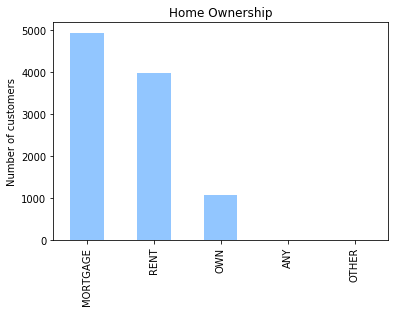

In [25]:
fig = data1['home_ownership'].value_counts().plot.bar()
fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers')

In [26]:
data1['home_ownership'].value_counts()

MORTGAGE    4937
RENT        3980
OWN         1075
ANY            6
OTHER          2
Name: home_ownership, dtype: int64

In [27]:
data1.purpose.unique()

array(['other', 'debt_consolidation', 'home_improvement', 'credit_card',
       'moving', 'medical', 'car', 'major_purchase', 'house',
       'small_business', 'vacation', 'renewable_energy', 'wedding'],
      dtype=object)

Text(0, 0.5, 'Number of customers')

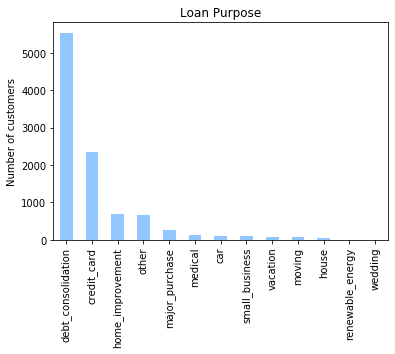

In [28]:
fig = data1['purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

In [29]:
data1.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Text(0, 0.5, 'Number of customers')

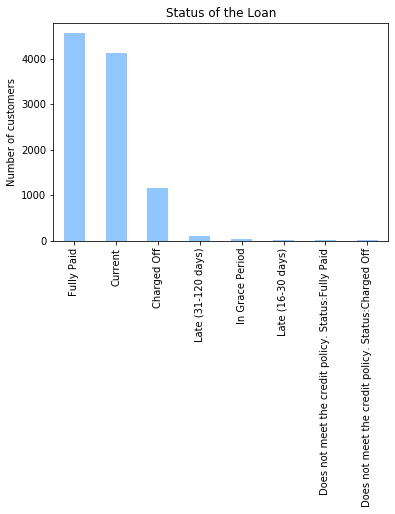

In [30]:
fig = data1['loan_status'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

### Date & Time

_A special type of categorical variable are those that instead of taking traditional labels, like color (blue, red), or city (London, Manchester), take dates as values. For example, date of birth ('29-08-1987', '12-01-2012'), or time of application ('2016-Dec', '2013-March')._

_Datetime variables can contain dates only, or time only, or date and time._

_Typically, we would never work with a date variable as a categorical variable, for a variety of reasons:_

1. _Date variables usually contain a huge number of individual categories, which will expand the feature space dramatically_
2. _Date variables allow us to capture much more information from the dataset if preprocessed in the right way_

In [31]:
data1.dtypes

id                float64
loan_amnt           int64
int_rate          float64
grade              object
home_ownership     object
annual_inc        float64
issue_d            object
loan_status        object
purpose            object
open_acc          float64
last_pymnt_d       object
open_il_12m       float64
dtype: object

In [32]:
data1['issue_dt'] = pd.to_datetime(data1.issue_d)
data1['last_pymnt_dt'] = pd.to_datetime(data1.last_pymnt_d)

data1[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
70642,Nov-2018,2018-11-01,Feb-2019,2019-02-01
490788,Jan-2018,2018-01-01,Feb-2019,2019-02-01
2081591,Feb-2014,2014-02-01,Feb-2017,2017-02-01
900431,Oct-2016,2016-10-01,Jan-2019,2019-01-01
781582,Feb-2016,2016-02-01,Jun-2018,2018-06-01


Text(0, 0.5, 'Disbursed Amount (US Dollars)')

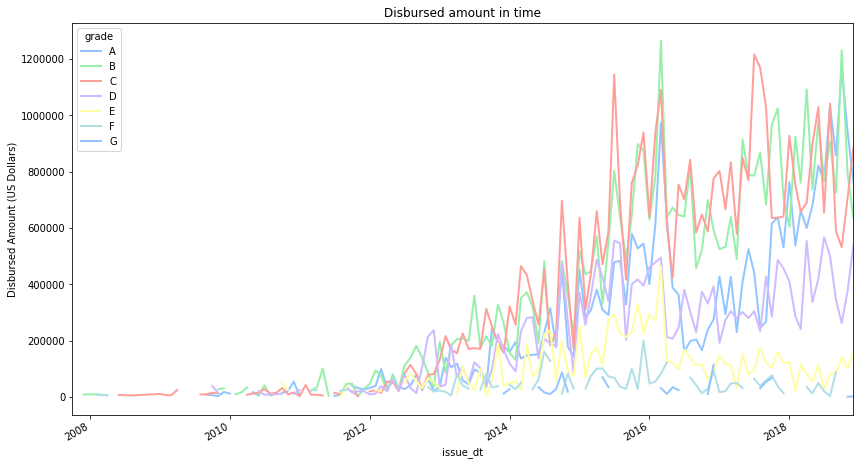

In [33]:
fig = data1.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(figsize=(14, 8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount (US Dollars)')

### Mixed Variables

_Mixed variables are those which values contain both numbers and labels._

_Variables can be mixed for a variety of reasons. For example, when credit agencies gather and store financial information of users, usually, the values of the variables they store are numbers. However, in some cases the credit agencies cannot retrieve information for a certain user for different reasons. What Credit Agencies do in these situations is to code each different reason due to which they failed to retrieve information with a different code or 'label'. Like this, they generate mixed type variables. These variables contain numbers when the value could be retrieved, or labels otherwise._

_As an example, think of the variable 'number_of_open_accounts'. It can take any number, representing the number of different financial accounts of the borrower. Sometimes, information may not be available for a certain borrower, for a variety of reasons. Each reason will be coded by a different letter, for example: 'A': couldn't identify the person, 'B': no relevant data, 'C': person seems not to have any open account._

_Another example of mixed type variables, is for example the variable missed_payment_status. This variable indicates, whether a borrower has missed a (any) payment in their financial item. For example, if the borrower has a credit card, this variable indicates whether they missed a monthly payment on it. Therefore, this variable can take values of 0, 1, 2, 3 meaning that the customer has missed 0-3 payments in their account. And it can also take the value D, if the customer defaulted on that account._

_Typically, once the customer has missed 3 payments, the lender declares the item defaulted (D), that is why this variable takes numerical values 0-3 and then D._